# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
%load_ext autoreload
%aimport agent, models

In [2]:
!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.21 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
from unityagents import UnityEnvironment
import numpy as np
from workspace_utils import active_session

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
import agent

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


In [7]:
states

array([[  0.00000000e+00,  -4.00000000e+00,   0.00000000e+00,
          1.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -4.37113883e-08,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -1.00000000e+01,
          0.00000000e+00,   1.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -4.37113883e-08,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   5.75471878e+00,
         -1.00000000e+00,   5.55726671e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,  -1.68164849e-01]])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [8]:
'''env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
iteration = 0
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    print("\t", actions)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    if rewards[0] != 0:
        print("rewards", rewards)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        print(iteration)
        break
    iteration += 1
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
'''

'env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\niteration = 0\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    print("\t", actions)\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    if rewards[0] != 0:\n        print("rewards", rewards)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards                         # update the score (fo

In [ ]:
import queue
from collections import deque

print_every = 200
# seems to be 1000 for the env anyway
max_ts = 2000
max_episodes = 1000
curr_agent = agent.Agent(state_size, action_size)

env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
state = env_info.vector_observations[0]                  # get the current state (for each agent)
# can't use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"
scores = deque(maxlen=100)                          # initialize the score (for each agent)
scores_history = []

episode_won_i = 0

with active_session():
    # TODO: maybe set max # of episodes
    for i in range(max_episodes):
        score = 0
        for t in range(max_ts):
            action = curr_agent.act(state.astype('float32', copy=False))
            
            # because random numpy actions at the beginning are already numpy
            try:
                action = action.to("cpu").detach().numpy()
            except:
                pass
            if t % print_every == 0:
                print('\taction', action)
            env_info = env.step(action)[brain_name]
            reward = env_info.rewards[0]
            if reward != 0:
                print("reward", reward)
            next_state = env_info.vector_observations[0]
            done = env_info.local_done[0]
            
            score = score * curr_agent.Q_DISCOUNT + reward

            curr_agent.step(state, action, reward, next_state, done)


            if done: 
                print("episode {} at {} ts; done reached".format(i, t))
                break
        scores_history.append(score)
        scores.append(score)
        if i % print_every == 0:
            print("episode {}; average score past 100 episodes: {}".format(i, np.mean(scores)))
        if np.mean(scores) >= 30:
            episode_won_i = i
            print("Solved in {} episodes".format(episode_won_i))
            curr_agent.save()
            break
        
        

In [9]:
import queue
from collections import deque

print_every = 200
# seems to be 1000 for the env anyway
max_ts = 2000
max_episodes = 1000
curr_agent = agent.Agent(state_size, action_size)

env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
state = env_info.vector_observations[0]                  # get the current state (for each agent)
# can't use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"
scores = deque(maxlen=100)                          # initialize the score (for each agent)
scores_history = []


# env expecting the list?
# action not in the form env was expecting?

# dropout too high?
# why are all the negatives in a certain col? - dropout, not high enough experience? smthg wrong w adding experience?
# changed dropout to 0, min_to_sample lower -> all same #s 
#     -> based on random, stay similar thru episodes that aren't learning!!

episode_won_i = 0

with active_session():
    # TODO: maybe set max # of episodes
    for i in range(max_episodes):
        score = 0
        for t in range(max_ts):
            action = curr_agent.act(state.astype('float32', copy=False))
            
            # because random numpy actions at the beginning are already numpy
            try:
                action = action.to("cpu").detach().numpy()
            except:
                pass
            if t % print_every == 0:
                print('\taction', action)
            env_info = env.step(action)[brain_name]
            reward = env_info.rewards[0]
            if reward != 0:
            #if reward[0] != 0:
                print("reward", reward)
            next_state = env_info.vector_observations[0]
            done = env_info.local_done[0]
            
            #score = score * curr_agent.Q_DISCOUNT + reward[0]
            score = score * curr_agent.Q_DISCOUNT + reward

            curr_agent.step(state, action, reward, next_state, done)

            # done is a vector
            if done: 
            #if done[0]: 
                print("episode {} at {} ts; done reached".format(i, t))
                break
        scores_history.append(score)
        scores.append(score)
        if i % print_every == 0:
            print("episode {}; average score past 100 episodes: {}".format(i, np.mean(scores)))
        if np.mean(scores) >= 30:
            episode_won_i = i
            print("Solved in {} episodes".format(episode_won_i))
            curr_agent.save()
            break
        
        

	action [[-1. -1. -1.  1.]]
	action [-0.01355291  0.0133862  -0.00910935 -0.02073509]
	action [-0.01934963  0.01388074 -0.00928546 -0.01590067]
	action [-0.01715907  0.01003829 -0.00716597 -0.01449142]
	action [-0.01687749  0.01411309 -0.00816295 -0.01608422]
	action [-0.01954278  0.01635416 -0.00734302 -0.01746567]
episode 0 at 1000 ts; done reached
episode 0; average score past 100 episodes: 0.0
	action [-0.01603442  0.01500062 -0.00811853 -0.01363931]
	action [-0.01755068  0.01407663 -0.01425926 -0.01746282]
	action [-0.01981234  0.01653141 -0.0099326  -0.0178926 ]
	action [-0.01316553  0.01378814 -0.00981646 -0.0199081 ]
	action [-0.02097308  0.01439666 -0.00826162 -0.01848201]
	action [-0.0189874   0.01096296 -0.01105189 -0.01989715]
episode 1 at 1000 ts; done reached
	action [-0.01880753  0.01680303 -0.01525316 -0.02215725]
	action [-0.01570567  0.01096454 -0.00624238 -0.0155769 ]
	action [-0.019549    0.01195749 -0.00672644 -0.02047123]
	action [-0.01728254  0.01209556 -0.010176

	action [-0.02111276  0.01656569 -0.00898705 -0.02126743]
	action [-0.01140634  0.01258386 -0.01025984 -0.01593303]
	action [-0.02194205  0.0172293  -0.01028314 -0.01622161]
episode 21 at 1000 ts; done reached
	action [-0.02135369  0.01797192 -0.01087768 -0.02076504]
	action [-0.01721035  0.01450446 -0.00625177 -0.01680854]
	action [-0.01880333  0.01538697 -0.01137871 -0.02313448]
	action [-0.01400037  0.00806728 -0.01102202 -0.02192359]
	action [-0.0196161   0.00729415 -0.00528286 -0.02169188]
	action [-0.0144062   0.01631005 -0.01547995 -0.02467626]
episode 22 at 1000 ts; done reached
	action [-0.0128328   0.01744368 -0.01390188 -0.01539077]
	action [-0.01709032  0.01678518 -0.00730538 -0.02532793]
	action [-0.02348171  0.01353013 -0.01019058 -0.01900778]
	action [-0.0226969   0.0145865  -0.00942557 -0.02485459]
	action [-0.01651344  0.00803802 -0.00998606 -0.01674278]
	action [-0.0186725   0.01480498 -0.00666052 -0.02086345]
episode 23 at 1000 ts; done reached
	action [-0.01992391  

	action [-0.01358293  0.0138029  -0.01422892 -0.01709656]
	action [-0.01798768  0.01603447 -0.01339373 -0.02310167]
	action [-0.01542607  0.01171195 -0.00341716 -0.01781976]
	action [-0.02171331  0.01787751 -0.01019579 -0.02561801]
	action [-0.01651838  0.01741146 -0.00785848 -0.01925546]
episode 43 at 1000 ts; done reached
	action [-0.01909902  0.0160262  -0.00529169 -0.02381038]
	action [-0.01959597  0.01693049 -0.01195323 -0.01844396]
	action [-0.02053871  0.01679347 -0.00865099 -0.02006309]
	action [-0.01511473  0.01405304 -0.00838204 -0.01640748]
	action [-0.02128029  0.01499338 -0.00812774 -0.01763096]
	action [-0.01920534  0.02018093 -0.01281904 -0.02192334]
episode 44 at 1000 ts; done reached
	action [-0.0148554   0.01572991 -0.00815306 -0.01960816]
	action [-0.01902779  0.0134877  -0.00458528 -0.0175076 ]
	action [-0.01739719  0.01937214 -0.01825744 -0.01990251]
	action [-0.01998431  0.01501599 -0.01507038 -0.02089213]
	action [-0.01850948  0.01637746 -0.00486159 -0.0226088 ]


	action [-0.01873622  0.01229561 -0.00625243 -0.02103307]
	action [-0.01440536  0.01308819 -0.007668   -0.02008798]
episode 64 at 1000 ts; done reached
	action [-0.01959105  0.00761046 -0.00792976 -0.01680393]
	action [-0.01770252  0.01199634 -0.00818815 -0.01893974]
	action [-0.01215176  0.01599338 -0.01070696 -0.01975908]
	action [-0.01587118  0.01929792 -0.00668397 -0.02315779]
	action [-0.01636597  0.0142409  -0.00580879 -0.02465996]
	action [-0.01669435  0.02009575 -0.01085231 -0.0186422 ]
episode 65 at 1000 ts; done reached
	action [-0.01883469  0.01513779 -0.0083084  -0.02072726]
	action [-0.02081358  0.00842442 -0.01034616 -0.02032653]
	action [-0.01571269  0.01235802 -0.0133795  -0.01647341]
	action [-0.02338073  0.01340735 -0.00610553 -0.02374091]
	action [-0.01814029  0.01671309 -0.01078162 -0.01904717]
	action [-0.02072719  0.01313111 -0.00823698 -0.02033657]
episode 66 at 1000 ts; done reached
	action [-0.02229462  0.01533274 -0.00694131 -0.0169121 ]
	action [-0.01522869  

	action [-0.01814927  0.01276449 -0.01171705 -0.01858224]
	action [-0.02133838  0.01570695 -0.01505264 -0.02382175]
	action [-0.01346765  0.01528084 -0.01365268 -0.01562798]
	action [-0.01795125  0.01414645 -0.01239287 -0.02566072]
	action [-0.01786368  0.01579451 -0.00902969 -0.02134203]
episode 86 at 1000 ts; done reached
	action [-0.02032783  0.01782945 -0.00841212 -0.0216017 ]
	action [-0.0152437   0.01362352 -0.00891961 -0.01835938]
	action [-0.02173779  0.01281756 -0.00710223 -0.0200922 ]
	action [-0.01231022  0.01346164 -0.00591805 -0.01929996]
	action [-0.01840437  0.01594212 -0.01337551 -0.02634537]
	action [-0.02010604  0.01144094 -0.00851351 -0.02310344]
episode 87 at 1000 ts; done reached
	action [-0.02143148  0.00738305 -0.00902694 -0.0226456 ]
	action [-0.01920686  0.0123425  -0.00905814 -0.02023323]
	action [-0.01514621  0.01289667 -0.00815798 -0.02112688]
	action [-0.01859475  0.00635722 -0.01088365 -0.01789198]
	action [-0.01520781  0.01371554 -0.01060577 -0.01733855]


	action [-0.01564859  0.01371197 -0.00831052 -0.02138862]
	action [-0.01583564  0.01346403 -0.00622897 -0.02160614]
episode 107 at 1000 ts; done reached
	action [-0.02245921  0.01430101 -0.00766541 -0.02501635]
	action [-0.01858984  0.01178787 -0.00810033 -0.01750241]
	action [-0.01643921  0.01428707 -0.01178909 -0.02271994]
	action [-0.01744519  0.01159703 -0.0081579  -0.01824601]
	action [-0.01828451  0.01124204 -0.00816214 -0.01926595]
	action [-0.01601622  0.01504865 -0.01130066 -0.02034646]
episode 108 at 1000 ts; done reached
	action [-0.02007183  0.01741132 -0.01010235 -0.01881913]
	action [-0.02212095  0.01459526 -0.0089803  -0.02229621]
	action [-0.02019834  0.01668867 -0.00833673 -0.02197151]
	action [-0.02333245  0.01186098 -0.0083456  -0.02077623]
	action [-0.01908319  0.01661862 -0.00896557 -0.01789938]
	action [-0.01944871  0.01094897 -0.01423493 -0.01736004]
episode 109 at 1000 ts; done reached
	action [-0.01985779  0.01317936 -0.01053505 -0.02065525]
	action [-0.0175385

	action [-0.01981686  0.01386973 -0.0099342  -0.01825676]
	action [-0.02095651  0.01254079 -0.0084405  -0.01899025]
	action [-0.02138514  0.01314423 -0.01066188 -0.02025152]
	action [-0.01921415  0.01773752 -0.01317397 -0.01895285]
	action [-0.01709049  0.01111561 -0.00769266 -0.01987033]
episode 129 at 1000 ts; done reached
	action [-0.01678569  0.01677485 -0.00996124 -0.01415099]
	action [-0.01652388  0.01356216 -0.0110111  -0.02299073]
	action [-0.01911041  0.01357242 -0.01008291 -0.01592461]
	action [-0.02210001  0.0140081  -0.00810649 -0.02452456]
	action [-0.02131582  0.01642027 -0.01078636 -0.01992721]
	action [-0.01413443  0.01273428 -0.00587614 -0.02196929]
episode 130 at 1000 ts; done reached
	action [-0.01912863  0.01322803 -0.00937055 -0.01766564]
	action [-0.01578145  0.01572598 -0.00477142 -0.01924367]
	action [-0.02118749  0.01220715 -0.01322646 -0.02123958]
	action [-0.01777472  0.01494774 -0.0101764  -0.01952773]
	action [-0.01914373  0.01726018 -0.0129693  -0.02392143

	action [-0.01931083  0.01423591 -0.00868695 -0.02246335]
	action [-0.01610939  0.01726378 -0.00682757 -0.02227733]
	action [-0.0185685   0.0133056  -0.00930175 -0.01848312]
episode 150 at 1000 ts; done reached
	action [-0.02044002  0.01365926 -0.00835667 -0.0171144 ]
	action [-0.02146124  0.01232115 -0.00914141 -0.01657114]
	action [-0.02201956  0.01090328 -0.00938605 -0.01804067]
	action [-0.01283552  0.01154791 -0.01461165 -0.01961765]
	action [-0.01632462  0.0132382  -0.01314637 -0.0136229 ]
	action [-0.01773651  0.01448023 -0.00935447 -0.01856972]
episode 151 at 1000 ts; done reached
	action [-0.01722897  0.011937   -0.00704374 -0.01840554]
	action [-0.01435688  0.01627444 -0.01096696 -0.01749554]
	action [-0.01789718  0.00973148 -0.00583704 -0.01671138]
	action [-0.01727824  0.0101386  -0.00786616 -0.01982478]
	action [-0.02204808  0.01722735 -0.01286492 -0.01653916]
	action [-0.02468828  0.0164224  -0.00481508 -0.01821528]
episode 152 at 1000 ts; done reached
	action [-0.0188391

	action [-0.0180454   0.01118822 -0.01412792 -0.01874121]
episode 171 at 1000 ts; done reached
	action [-0.01904527  0.01456779 -0.00858233 -0.0179025 ]
	action [-0.02114442  0.01076268 -0.00727158 -0.02590816]
	action [-0.02410611  0.01776721 -0.01657575 -0.01911962]
	action [-0.01723238  0.01273395 -0.00840245 -0.02261199]
	action [-0.01736728  0.01712984 -0.00749    -0.02139087]
	action [-0.01735307  0.01442334 -0.01018298 -0.02007012]
episode 172 at 1000 ts; done reached
	action [-0.01475726  0.01071854 -0.01420919 -0.01488693]
	action [-0.01833769  0.01086858 -0.00615403 -0.02243229]
	action [-0.01612506  0.01199933 -0.01197344 -0.01960765]
	action [-0.01990538  0.01233312 -0.0091521  -0.01899959]
	action [-0.02283941  0.01444784 -0.01212724 -0.02022551]
	action [-0.01865202  0.01537861 -0.00875711 -0.0207758 ]
episode 173 at 1000 ts; done reached
	action [-0.02262171  0.0137872  -0.00969262 -0.02094728]
	action [-0.01688813  0.01344752 -0.00809746 -0.01551994]
	action [-0.0191576

	action [-0.01477511  0.01421734 -0.00798432 -0.02006821]
	action [-0.01642025  0.01486722 -0.01414486 -0.02109441]
	action [-0.01888761  0.01708594 -0.00673547 -0.01931025]
	action [-0.02116122  0.01712167 -0.00922039 -0.02055653]
	action [-0.01831025  0.01299733 -0.00744485 -0.01965684]
episode 193 at 1000 ts; done reached
	action [-0.02044428  0.01483397 -0.00899144 -0.0200178 ]
	action [-0.01826268  0.01086152 -0.00946139 -0.0209881 ]
	action [-0.01795707  0.01419813 -0.012087   -0.02405339]
	action [-0.01680733  0.01001424 -0.0126513  -0.01920537]
	action [-0.02100887  0.01357901 -0.00690891 -0.01670294]
	action [-0.02032891  0.01515143 -0.0101668  -0.02276075]
episode 194 at 1000 ts; done reached
	action [-0.01838165  0.01137561 -0.01185397 -0.0180293 ]
	action [-0.02007653  0.0120532  -0.00520447 -0.02629486]
	action [-0.01623711  0.01798395 -0.00932311 -0.02462572]
	action [-0.01467529  0.01599747 -0.00973187 -0.02129595]
	action [-0.01649161  0.00954293 -0.01145181 -0.02168224

	action [-0.01663367  0.0139522  -0.01062051 -0.01996906]
	action [-0.01873549  0.01290213 -0.01528346 -0.02182518]
	action [-0.01994916  0.0152862  -0.01399824 -0.01436291]
	action [-0.01739817  0.01354165 -0.01872428 -0.01993686]
episode 214 at 1000 ts; done reached
	action [-0.02237353  0.01121703 -0.00875305 -0.01818417]
	action [-0.01968605  0.01320156 -0.00902017 -0.02043826]
	action [-0.02367547  0.01384992 -0.00960259 -0.02406616]
	action [-0.01901713  0.01294387 -0.00889307 -0.01819961]
	action [-0.02060086  0.01298231 -0.01100865 -0.02402399]
	action [-0.01929786  0.013577   -0.00617997 -0.02803912]
episode 215 at 1000 ts; done reached
	action [-0.01228649  0.00870667 -0.01146702 -0.01671937]
	action [-0.01997769  0.01143225 -0.010307   -0.01699727]
	action [-0.01935183  0.01547979 -0.01087877 -0.01763812]
	action [-0.01720359  0.00743055 -0.01430302 -0.02232326]
	action [-0.01840646  0.01696819 -0.00828757 -0.02180105]
	action [-0.01865263  0.01451801 -0.01098235 -0.01858072

	action [-0.02212382  0.01321402 -0.00995727 -0.02327538]
	action [-0.01739244  0.01471099 -0.01027642 -0.01868628]
episode 235 at 1000 ts; done reached
	action [-0.01539516  0.01187664 -0.00891256 -0.01786128]
	action [-0.01871027  0.01168802 -0.00973594 -0.02022559]
	action [-0.01550722  0.01590289 -0.01074136 -0.01801449]
	action [-0.01850186  0.00640835 -0.00906712 -0.01479773]
	action [-0.01521091  0.01365229 -0.00958317 -0.01452528]
	action [-0.01981799  0.01510268 -0.0100321  -0.02273566]
episode 236 at 1000 ts; done reached
	action [-0.01676797  0.01325659 -0.01202923 -0.02489446]
	action [-0.0184347   0.01468299 -0.00891141 -0.0280243 ]
	action [-0.02201648  0.01070957 -0.0099197  -0.01810523]
	action [-0.0168224   0.0109199  -0.01100841 -0.0168653 ]
	action [-0.01958036  0.01326662 -0.0113334  -0.01832997]
	action [-0.01698056  0.0155174  -0.01010198 -0.02394622]
episode 237 at 1000 ts; done reached
	action [-0.01287624  0.01364181 -0.01231609 -0.01687721]
	action [-0.0228415

	action [-0.01638619  0.01341577 -0.00544892 -0.02122124]
	action [-0.02021275  0.01271893 -0.00777877 -0.0223938 ]
	action [-0.01813653  0.01563803 -0.00979649 -0.01931139]
	action [-0.02214785  0.01624838 -0.01099161 -0.01734097]
	action [-0.01793714  0.01375997 -0.00350857 -0.01650863]
episode 257 at 1000 ts; done reached
	action [-0.01793583  0.01602304 -0.0119834  -0.01894102]
	action [-0.01579149  0.01657172 -0.01378088 -0.01668723]
	action [-0.02024893  0.00916115 -0.00672231 -0.01817382]
	action [-0.01966314  0.01129994 -0.00623512 -0.01935842]
	action [-0.01547713  0.01360002 -0.00793277 -0.01832589]
	action [-0.0218148   0.01460915 -0.01069246 -0.02012431]
episode 258 at 1000 ts; done reached
	action [-0.01793293  0.01723508 -0.00596049 -0.01754478]
	action [-0.0142477   0.01596176 -0.01251842 -0.0139166 ]
	action [-0.01553551  0.01005352 -0.0122613  -0.02236064]
	action [-0.01852629  0.01814579 -0.00667097 -0.02267804]
	action [-0.01369034  0.00993372 -0.00880875 -0.01641028

	action [-0.02164965  0.01455261 -0.00956085 -0.01833576]
	action [-0.01374703  0.01416683 -0.00961133 -0.01856842]
	action [-0.01985783  0.01442548 -0.00910388 -0.02211822]
episode 278 at 1000 ts; done reached
	action [-0.02070764  0.01133385 -0.00981022 -0.01973352]
	action [-0.02304466  0.01630641 -0.00914639 -0.02220787]
	action [-0.01452683  0.01322383 -0.00775439 -0.023221  ]
	action [-0.01974985  0.01832467 -0.00677658 -0.02256056]
	action [-0.02057198  0.01852691 -0.00960463 -0.01939287]
	action [-0.01576333  0.01677582 -0.00965629 -0.01622032]
episode 279 at 1000 ts; done reached
	action [-0.01944832  0.01397332 -0.00921278 -0.02180982]
	action [-0.01438994  0.01201152 -0.00889861 -0.01776642]
	action [-0.01838432  0.00819788 -0.01135486 -0.01922075]
	action [-0.01894071  0.01568223 -0.00929448 -0.01983763]
	action [-0.0170252   0.01352568 -0.0090192  -0.02070922]
	action [-0.01948971  0.01328373 -0.00575936 -0.02283319]
episode 280 at 1000 ts; done reached
	action [-0.0184636

	action [-0.01833222  0.0144263  -0.00690612 -0.01327714]
episode 299 at 1000 ts; done reached
	action [-0.01677798  0.01110329 -0.01120337 -0.01479903]
	action [-0.02142955  0.01238619 -0.01294207 -0.02104018]
	action [-0.01604188  0.01392633 -0.01150647 -0.01838264]
	action [-0.01571592  0.01476355 -0.01322237 -0.02396184]
	action [-0.01471634  0.01301179 -0.00837115 -0.01989841]
	action [-0.01441903  0.01413819 -0.01345166 -0.01635763]
episode 300 at 1000 ts; done reached
	action [-0.01742534  0.01623571 -0.00735669 -0.01469878]
	action [-0.01357685  0.01172022 -0.00903709 -0.02028789]
	action [-0.01666191  0.01281994 -0.00911336 -0.02020151]
	action [-0.02332751  0.01561278 -0.00600765 -0.01995045]
	action [-0.01713108  0.01288552 -0.01062335 -0.01792105]
	action [-0.01985306  0.01189794 -0.00587564 -0.01881194]
episode 301 at 1000 ts; done reached
	action [-0.02113052  0.00914968 -0.01415037 -0.0242554 ]
	action [-0.01822824  0.0167205  -0.01565368 -0.01668605]
	action [-0.0206918

	action [-0.02197098  0.01243636 -0.01225354 -0.02447266]
	action [-0.01805467  0.01922083 -0.00961764 -0.01985429]
	action [-0.0187913   0.01199251 -0.01261322 -0.02070558]
	action [-0.01784898  0.01386363 -0.01291251 -0.01695292]
	action [-0.0143538   0.01880188 -0.01100516 -0.02109493]
episode 321 at 1000 ts; done reached
	action [-0.02303788  0.0107427  -0.00697967 -0.02382588]
	action [-0.0188728   0.015708   -0.00513341 -0.02074729]
	action [-0.01989196  0.01189623 -0.01289689 -0.02198553]
	action [-0.02203394  0.0164561  -0.00834512 -0.02349425]
	action [-0.02003499  0.01620868 -0.00274555 -0.02472135]
	action [-0.0186579   0.01183093 -0.00871693 -0.02108169]
episode 322 at 1000 ts; done reached
	action [-0.01624725  0.01652242 -0.01190592 -0.01785485]
	action [-0.0193619   0.00938207 -0.01163074 -0.01826752]
	action [-0.01931786  0.01182366 -0.01153067 -0.01869992]
	action [-0.01880649  0.01542999 -0.00879275 -0.02074591]
	action [-0.0186451   0.01198518 -0.00926292 -0.02261056

	action [-0.02124364  0.01538634 -0.01224648 -0.0178009 ]
	action [-0.01876454  0.01526879 -0.0126263  -0.02092864]
	action [-0.01956909  0.01673637 -0.00933863 -0.02198999]
episode 342 at 1000 ts; done reached
	action [-0.01892317  0.01612197 -0.01293993 -0.01889329]
	action [-0.02329944  0.01578842 -0.00856529 -0.02164889]
	action [-0.01414688  0.01446064 -0.01102023 -0.01600135]
	action [-0.01895873  0.01357577 -0.00710498 -0.02272361]
	action [-0.01665648  0.00723672 -0.00989938 -0.02176582]
	action [-0.01972592  0.01548085 -0.00950145 -0.02054347]
episode 343 at 1000 ts; done reached
	action [-0.02054508  0.01579455 -0.01234032 -0.02100747]
	action [-0.02074224  0.0132645  -0.01456967 -0.02158581]
	action [-0.02448183  0.01427216 -0.00097946 -0.01952149]
	action [-0.02261058  0.01121156 -0.00667525 -0.01595016]
	action [-0.02177475  0.01225985 -0.01212697 -0.01940112]
	action [-0.01443549  0.01282252 -0.01150146 -0.01591803]
episode 344 at 1000 ts; done reached
	action [-0.0178229

	action [-0.01628465  0.01404757 -0.01120326 -0.02024464]
episode 363 at 1000 ts; done reached
	action [-0.01918044  0.01352278 -0.00848473 -0.02359544]
	action [-0.01952792  0.0161455  -0.00874913 -0.02364999]
	action [-0.01904784  0.0164413  -0.01087477 -0.01948223]
	action [-0.01930793  0.01320219 -0.00315882 -0.02155568]
	action [-0.0186428   0.01345291 -0.01369352 -0.02121622]
	action [-0.01787575  0.0173058  -0.01017911 -0.02374381]
episode 364 at 1000 ts; done reached
	action [-0.01561775  0.0130939  -0.01080475 -0.01882799]
	action [-0.0165985   0.01026712 -0.01617778 -0.01638665]
	action [-0.02205691  0.01758451 -0.01024638 -0.01995305]
	action [-0.02152001  0.01256722 -0.00867065 -0.02399087]
	action [-0.01341807  0.0149266  -0.00778637 -0.02126243]
	action [-0.02009197  0.01202647 -0.00593422 -0.01787094]
episode 365 at 1000 ts; done reached
	action [-0.0184937   0.01228297 -0.01342993 -0.02035341]
	action [-0.02045611  0.013754   -0.00651067 -0.01918324]
	action [-0.0158262

	action [-0.01943641  0.0111908  -0.01011428 -0.02346571]
	action [-0.01752691  0.01384784 -0.01114506 -0.0201521 ]
	action [-0.0189382   0.01286733 -0.01175267 -0.02000435]
	action [-0.01589317  0.01187249 -0.01374702 -0.02305936]
	action [-0.01667475  0.01400011 -0.01037806 -0.0151056 ]
episode 385 at 1000 ts; done reached
	action [-0.01512575  0.01516157 -0.00633305 -0.01954749]
	action [-0.02024165  0.01577856 -0.01072304 -0.01253123]
	action [-0.02133866  0.01954976 -0.00891651 -0.02089199]
	action [-0.02210522  0.01687895 -0.01355742 -0.02155249]
	action [-0.01668436  0.01340882 -0.01162646 -0.01745214]
	action [-0.01515662  0.01442258 -0.00932195 -0.0195223 ]
episode 386 at 1000 ts; done reached
	action [-0.01825376  0.00896792 -0.00496976 -0.01931605]
	action [-0.02336825  0.01435263 -0.012845   -0.02232269]
	action [-0.01998729  0.01160103 -0.0065136  -0.02171719]
	action [-0.01579518  0.01643143 -0.0112986  -0.01859779]
	action [-0.01837899  0.01261417 -0.01200377 -0.0210805 

	action [-0.01690232  0.01479283 -0.00813084 -0.02039068]
	action [-0.02025649  0.01622104 -0.01201215 -0.01870698]
	action [-0.01737516  0.01452766 -0.01357632 -0.0214667 ]
	action [-0.02071261  0.01139573 -0.00992942 -0.01727135]
episode 406 at 1000 ts; done reached
	action [-0.01960751  0.01467219 -0.00456949 -0.02426524]
	action [-0.02229834  0.00925542 -0.00712248 -0.02266624]
	action [-0.01795616  0.01687936 -0.01115869 -0.02467311]
	action [-0.02130175  0.01605903 -0.00486299 -0.02405776]
	action [-0.01929768  0.01440698 -0.00718149 -0.01604691]
	action [-0.01961484  0.01639418 -0.0108639  -0.0198636 ]
episode 407 at 1000 ts; done reached
	action [-0.01872172  0.01747621 -0.00975767 -0.02279429]
	action [-0.01743829  0.01589191 -0.00877345 -0.02018037]
	action [-0.017952    0.011351   -0.01110361 -0.02327299]
	action [-0.01845793  0.01579911 -0.01488107 -0.02197667]
	action [-0.01691358  0.01727589 -0.0111971  -0.0213836 ]
	action [-0.02041881  0.01376132 -0.00987508 -0.01558027

	action [-0.02072483  0.01381018 -0.00582016 -0.01816721]
	action [-0.01493971  0.01260631 -0.01139129 -0.01904651]
episode 427 at 1000 ts; done reached
	action [-0.01796651  0.01476913 -0.01223391 -0.01751751]
	action [-0.01651135  0.01142007 -0.00858464 -0.01843683]
	action [-0.01742896  0.01070381 -0.0102709  -0.02165139]
	action [-0.01507248  0.01454874 -0.01094969 -0.01396442]
	action [-0.01958057  0.01477466 -0.01346855 -0.02190039]
	action [-0.01797022  0.02043569 -0.0100984  -0.0228629 ]
episode 428 at 1000 ts; done reached
	action [-0.01908331  0.01727615 -0.00856102 -0.02059832]
	action [-0.02014506  0.01198217 -0.0124834  -0.02187306]
	action [-0.01838557  0.0129945  -0.01213595 -0.01788797]
	action [-0.01802456  0.0144919  -0.0045825  -0.02017794]
	action [-0.0186547   0.01525151 -0.00482282 -0.02628814]
	action [-0.01729547  0.01182064 -0.00527863 -0.02009933]
episode 429 at 1000 ts; done reached
	action [-0.01805741  0.01289983 -0.01564321 -0.02289903]
	action [-0.0192502

	action [-0.01887066  0.01416555 -0.0078701  -0.01916474]
	action [-0.02071504  0.0158262  -0.00797072 -0.02161026]
	action [-0.01818934  0.0157541  -0.01133784 -0.01677431]
	action [-0.01600404  0.01450516 -0.01028344 -0.01998184]
	action [-0.01414634  0.00879903 -0.0101645  -0.01852655]
episode 449 at 1000 ts; done reached
	action [-0.01103418  0.00555175 -0.01013051 -0.01641303]
	action [-0.02051105  0.01679232 -0.01579412 -0.02256019]
	action [-0.01894368  0.01034985 -0.01074022 -0.02023048]
	action [-0.01778986  0.01666497 -0.00673552 -0.02549208]
	action [-0.01976701  0.01539539 -0.01655642 -0.02361931]
	action [-0.01943477  0.01455072 -0.00800598 -0.01977384]
episode 450 at 1000 ts; done reached
	action [-0.01522171  0.01330392 -0.01322292 -0.01683973]
	action [-0.0176453   0.01443262 -0.01110597 -0.01761443]
	action [-0.01775794  0.01183957 -0.01052329 -0.01856894]
	action [-0.0185893   0.0118661  -0.00859617 -0.02264658]
	action [-0.01735794  0.01372946 -0.01182195 -0.02303626

	action [-0.01726349  0.01500108 -0.00783017 -0.01892447]
	action [-0.02274511  0.01292847 -0.0110767  -0.02066218]
	action [-0.02162951  0.01190618 -0.00878454 -0.02348156]
episode 470 at 1000 ts; done reached
	action [-0.01991254  0.00989407 -0.00839437 -0.01798676]
	action [-0.02228054  0.01357449 -0.00668973 -0.01849251]
	action [-0.02050627  0.01429472 -0.00341815 -0.01775743]
	action [-0.02119359  0.01280722 -0.00981297 -0.01327883]
	action [-0.01764571  0.01162922 -0.00771724 -0.02173455]
	action [-0.0213672   0.01800057 -0.00636023 -0.01976223]
episode 471 at 1000 ts; done reached
	action [-0.01639891  0.01459705 -0.00810874 -0.01952313]
	action [-0.01801196  0.018267   -0.00951135 -0.02443694]
	action [-0.02303047  0.01664965 -0.00545282 -0.01950417]
	action [-0.02069716  0.01105603 -0.01375213 -0.02248823]
	action [-0.01435289  0.01790473 -0.00783346 -0.02026229]
	action [-0.01422501  0.01275137 -0.01427568 -0.0171406 ]
episode 472 at 1000 ts; done reached
	action [-0.0188354

	action [-0.01592975  0.01243161 -0.00420664 -0.02154777]
episode 491 at 1000 ts; done reached
	action [-0.0189711   0.01329476 -0.01089863 -0.0265348 ]
	action [-0.02522623  0.01834323 -0.00859141 -0.01886084]
	action [-0.01710042  0.01428157 -0.01049335 -0.01736897]
	action [-0.01486171  0.00947487 -0.00891735 -0.02204311]
	action [-0.02080843  0.01439392 -0.0110699  -0.02417811]
	action [-0.01270019  0.01017411 -0.00997307 -0.01662127]
episode 492 at 1000 ts; done reached
	action [-0.02064216  0.0130414  -0.00844581 -0.02094489]
	action [-0.01503874  0.01674226 -0.01170994 -0.01711165]
	action [-0.01094131  0.01064106 -0.01094855 -0.01816828]
	action [-0.0139353   0.01619935 -0.0074663  -0.02182476]
	action [-0.02291988  0.01264335 -0.00695695 -0.02190253]
	action [-0.0193414   0.01296656 -0.0076044  -0.02495416]
episode 493 at 1000 ts; done reached
	action [-0.0182534   0.01263567 -0.01180567 -0.01988248]
	action [-0.02158382  0.0145106  -0.00813387 -0.01801811]
	action [-0.0182858

	action [-0.01713534  0.01829734 -0.01104035 -0.01651656]
	action [-0.01921738  0.01510796 -0.00580092 -0.01901932]
	action [-0.01407519  0.01838826 -0.0031421  -0.01718583]
	action [-0.01544298  0.01705423 -0.01141903 -0.01963727]
	action [-0.01628775  0.01490398 -0.00683363 -0.02151145]
episode 513 at 1000 ts; done reached
	action [-0.02084278  0.01336767 -0.00714197 -0.02001524]
	action [-0.01790275  0.01183964 -0.01119929 -0.02208007]
	action [-0.0177216   0.01749502 -0.01293214 -0.01886415]
	action [-0.02315929  0.01485435 -0.00690782 -0.02132057]
	action [-0.0179089   0.01898655 -0.01478977 -0.0241842 ]
	action [-0.02166553  0.01175107 -0.00673524 -0.02070742]
episode 514 at 1000 ts; done reached
	action [-0.01635717  0.01300482 -0.01349863 -0.01768111]
	action [-0.0201138   0.01497742 -0.00683854 -0.02127624]
	action [-0.01622653  0.00973768 -0.01118956 -0.02259214]
	action [-0.01893163  0.01061504 -0.01079083 -0.02147691]
	action [-0.02408535  0.01442537 -0.01142565 -0.02032004

	action [-0.01750731  0.01183294 -0.01098916 -0.01900804]
	action [-0.0183554   0.01319559 -0.00380237 -0.01586772]
	action [-0.02118622  0.01594649 -0.01212099 -0.02222821]
episode 534 at 1000 ts; done reached
	action [-0.01574894  0.01720713 -0.01298598 -0.02089198]
	action [-0.02056548  0.01213714 -0.00969288 -0.0185679 ]
	action [-0.0182921   0.01224588 -0.00260999 -0.0239059 ]
	action [-0.02314862  0.01063957 -0.01048742 -0.0217194 ]
	action [-0.01568481  0.01024899 -0.0114317  -0.01858075]
	action [-0.01609051  0.01497592 -0.01047783 -0.01602652]
episode 535 at 1000 ts; done reached
	action [-0.02242672  0.01356682 -0.00802604 -0.02092994]
	action [-0.01475219  0.01632357 -0.01134752 -0.02180106]
	action [-0.01685676  0.01245929 -0.01084322 -0.0174508 ]
	action [-0.01786825  0.01183654 -0.01273478 -0.02010085]
	action [-0.01289319  0.01634044 -0.00921207 -0.02483713]
	action [-0.01936311  0.01507625 -0.01335966 -0.01922337]
episode 536 at 1000 ts; done reached
	action [-0.0186232

	action [-0.01717507  0.01558602 -0.01399295 -0.02153399]
episode 555 at 1000 ts; done reached
	action [-0.0182337   0.00981713 -0.01310689 -0.01565556]
	action [-0.02333579  0.01393387 -0.0084041  -0.01982105]
	action [-0.01845174  0.01178586 -0.00837816 -0.02327267]
	action [-0.01906074  0.01370039 -0.00911349 -0.02018623]
	action [-0.01096467  0.011929   -0.01574517 -0.01792513]
	action [-0.02241746  0.01255985 -0.00697688 -0.01795564]
episode 556 at 1000 ts; done reached
	action [-0.01672461  0.01250115 -0.01148568 -0.02020194]
	action [-0.02464044  0.01592108 -0.00979666 -0.01935156]
	action [-0.01872853  0.01347206 -0.00725715 -0.01806698]
	action [-0.01661187  0.0173077  -0.008179   -0.0182339 ]
	action [-0.02123385  0.01553828 -0.01068341 -0.02222608]
	action [-0.01835275  0.01629011 -0.01039449 -0.02026825]
episode 557 at 1000 ts; done reached
	action [-0.01681284  0.01596591 -0.00777893 -0.01649855]
	action [-0.01246293  0.00916441 -0.01242624 -0.0130934 ]
	action [-0.0229105

	action [-0.01637021  0.01627291 -0.00634392 -0.02150571]
	action [-0.0201469   0.01740707 -0.01099562 -0.02425075]
	action [-0.01429671  0.01290196 -0.00615861 -0.02093026]
	action [-0.01652368  0.01697646 -0.01181883 -0.01674146]
	action [-0.01942122  0.01155461 -0.01092885 -0.02181461]
episode 577 at 1000 ts; done reached
	action [-0.01859277  0.01371143 -0.01463455 -0.0171084 ]
	action [-0.01967546  0.012574   -0.00680131 -0.01473109]
	action [-0.01300584  0.01153642 -0.01293494 -0.02059966]
	action [-0.01586438  0.01414975 -0.0059841  -0.02054946]
	action [-0.01676646  0.01539486 -0.00614892 -0.0225999 ]
	action [-0.01726501  0.01628097 -0.00591653 -0.02599901]
episode 578 at 1000 ts; done reached
	action [-0.01744788  0.01222336 -0.0112773  -0.02085708]
	action [-0.02081872  0.01617029 -0.01308841 -0.02309739]
	action [-0.02044101  0.01620396 -0.00874456 -0.01894351]
	action [-0.01936763  0.0143138  -0.00484677 -0.02000049]
	action [-0.0171019   0.01350024 -0.01501224 -0.02420969

	action [-0.01760898  0.01212485 -0.00595284 -0.02288028]
	action [-0.01369175  0.01247391 -0.0107444  -0.02330879]
	action [-0.01848395  0.01479988 -0.01078463 -0.02617302]
episode 598 at 1000 ts; done reached
	action [-0.01731932  0.0162946  -0.01484235 -0.02060904]
	action [-0.0168171   0.01191424 -0.00817517 -0.02110056]
	action [-0.01848013  0.01728713 -0.00639363 -0.02391111]
	action [-0.01645787  0.01536046 -0.00832448 -0.02107596]
	action [-0.01734388  0.01540017 -0.0104199  -0.0191663 ]
	action [-0.01915611  0.01408653 -0.01292701 -0.0199608 ]
episode 599 at 1000 ts; done reached
	action [-0.02098399  0.01459042 -0.0078529  -0.0169513 ]
	action [-0.02260649  0.01383418 -0.0109863  -0.02268339]
	action [-0.01977169  0.00698587 -0.01406503 -0.02104365]
	action [-0.01902768  0.01374299 -0.01335458 -0.02053638]
	action [-0.01405463  0.01414777 -0.01197978 -0.0183306 ]
	action [-0.01610508  0.0115753  -0.00828873 -0.02087098]
episode 600 at 1000 ts; done reached
episode 600; averag

	action [-0.02118442  0.01650627 -0.00850579 -0.0200605 ]
	action [-0.01618498  0.01670178 -0.01136586 -0.01589594]
episode 619 at 1000 ts; done reached
	action [-0.01542859  0.01179332 -0.01271352 -0.01742988]
	action [-0.01946242  0.01772137 -0.00806486 -0.02066396]
	action [-0.01752606  0.01433989 -0.01333404 -0.02686089]
	action [-0.02012984  0.01141815 -0.01043693 -0.01910134]
	action [-0.01584382  0.01083927 -0.01073003 -0.02151978]
	action [-0.0174952   0.01625503 -0.00930354 -0.01740871]
episode 620 at 1000 ts; done reached
	action [-0.01889804  0.00999795 -0.01202736 -0.01912541]
	action [-0.01479239  0.01087683 -0.01452942 -0.019299  ]
	action [-0.0213921   0.01726427 -0.00979504 -0.01863883]
	action [-0.02264488  0.01534282 -0.00852036 -0.0171639 ]
	action [-0.01785997  0.01138275 -0.00663768 -0.0191729 ]
	action [-0.02090157  0.0138625  -0.01036103 -0.01892344]
episode 621 at 1000 ts; done reached
	action [-0.01709276  0.01521385 -0.01607092 -0.01606848]
	action [-0.0175397

	action [-0.02202149  0.01753366 -0.01207879 -0.01774854]
	action [-0.02136431  0.01494474 -0.00851519 -0.02261194]
	action [-0.02233338  0.01231117 -0.00974308 -0.01897944]
	action [-0.01650213  0.01216282 -0.01149512 -0.02248897]
	action [-0.01975595  0.01556013 -0.01520045 -0.01541121]
episode 641 at 1000 ts; done reached
	action [-0.02493368  0.0156519  -0.01404215 -0.02181261]
	action [-0.02098789  0.01742104 -0.01417826 -0.02581087]
	action [-0.01604619  0.01248053 -0.01342903 -0.01967693]
	action [-0.02205926  0.01173245 -0.00845579 -0.02122789]
	action [-0.01963463  0.01131411 -0.0073613  -0.01579917]
	action [-0.02043133  0.01623345 -0.00672429 -0.02142007]
episode 642 at 1000 ts; done reached
	action [-0.01677229  0.01577549 -0.0138621  -0.01967155]
	action [-0.0186332   0.01329223 -0.00550653 -0.01634539]
	action [-0.01728176  0.01399982 -0.01316447 -0.02170563]
	action [-0.01692241  0.01078422 -0.01263677 -0.01907241]
	action [-0.01993579  0.01659315 -0.00804542 -0.01702113

	action [-0.02063607  0.0130477  -0.00835517 -0.01751916]
	action [-0.021522    0.01469035 -0.01319052 -0.01944377]
	action [-0.01856863  0.0182005  -0.00703042 -0.0229211 ]
episode 662 at 1000 ts; done reached
	action [-0.0191329   0.01397952 -0.01217136 -0.02105926]
	action [-0.01737983  0.00941882 -0.00484606 -0.01937427]
	action [-0.01316078  0.01423537 -0.01018807 -0.01875302]
	action [-0.02098802  0.01551251 -0.00565082 -0.01627524]
	action [-0.01830301  0.01341327 -0.01125605 -0.02238548]
	action [-0.01323214  0.00716624 -0.01501384 -0.01703601]
episode 663 at 1000 ts; done reached
	action [-0.01446256  0.01739764 -0.01327468 -0.01987279]
	action [-0.01342311  0.01230299 -0.0115862  -0.01867365]
	action [-0.01479416  0.01258385 -0.01141202 -0.01667311]
	action [-0.01916176  0.00885661 -0.0106103  -0.02217151]
	action [-0.01713461  0.01058404 -0.00819665 -0.02196188]
	action [-0.01347905  0.01224773 -0.01398622 -0.02273138]
episode 664 at 1000 ts; done reached
	action [-0.0200278

	action [-0.01683932  0.01425844 -0.00549827 -0.01577419]
episode 683 at 1000 ts; done reached
	action [-0.01717693  0.01243782 -0.01046096 -0.02108062]
	action [-0.01719041  0.01607461 -0.01176704 -0.01968959]
	action [-0.01725092  0.01226813 -0.01193529 -0.02384361]
	action [-0.01422848  0.01469293 -0.00990965 -0.02039868]
	action [-0.01550154  0.01691705 -0.0096867  -0.01163412]
	action [-0.02071351  0.01473653 -0.01102832 -0.02356092]
episode 684 at 1000 ts; done reached
	action [-0.01754447  0.01605125 -0.00615757 -0.01906338]
	action [-0.01895258  0.01340776 -0.01366556 -0.02020245]
	action [-0.01590579  0.00997679 -0.01539951 -0.0172731 ]
	action [-0.01470304  0.01444985 -0.00947788 -0.02103062]
	action [-0.02056462  0.01740748 -0.01490083 -0.0182615 ]
	action [-0.01686782  0.01561562 -0.00772093 -0.01744241]
episode 685 at 1000 ts; done reached
	action [-0.01472164  0.01356503 -0.01350057 -0.01636854]
	action [-0.02168069  0.01087671 -0.01155219 -0.02216695]
	action [-0.0187658

	action [-0.01781294  0.01289455 -0.01023766 -0.01943125]
	action [-0.02075799  0.01355649 -0.00779716 -0.01789763]
	action [-0.02040287  0.01344838 -0.00868448 -0.02039864]
	action [-0.02089878  0.01131791 -0.01302001 -0.02085349]
	action [-0.01913564  0.01629127 -0.00975003 -0.02305407]
episode 705 at 1000 ts; done reached
	action [-0.01766988  0.01535423 -0.01321235 -0.01930815]
	action [-0.01867666  0.01752458 -0.00578302 -0.02171021]
	action [-0.02211565  0.01638805 -0.00916594 -0.021356  ]
	action [-0.01826682  0.01207608 -0.00960373 -0.02208605]
	action [-0.01946212  0.01219518 -0.00651955 -0.02248564]
	action [-0.01567711  0.01397818 -0.00541425 -0.01404639]
episode 706 at 1000 ts; done reached
	action [-0.02097734  0.01328163 -0.00561285 -0.01953264]
	action [-0.01970883  0.0176661  -0.00754877 -0.01876885]
	action [-0.01922154  0.01258851 -0.00572536 -0.01853917]
	action [-0.01676627  0.01574124 -0.01197011 -0.01596668]
	action [-0.01808762  0.01406345 -0.00957218 -0.01817344

	action [-0.01705993  0.01169567 -0.01122991 -0.02398215]
	action [-0.01392648  0.01726912 -0.01208817 -0.01816162]
	action [-0.02166032  0.01318946 -0.00775327 -0.01411461]
episode 726 at 1000 ts; done reached
	action [-0.01916024  0.0221832  -0.01398706 -0.02183821]
	action [-0.01973072  0.01489324 -0.00849783 -0.02167387]
	action [-0.01794445  0.01344867 -0.00460803 -0.0223489 ]
	action [-0.02280727  0.01273193 -0.00968187 -0.01761741]
	action [-0.01984378  0.01373006 -0.00464913 -0.02111219]
	action [-0.01917748  0.01628382 -0.00776036 -0.01854687]
episode 727 at 1000 ts; done reached
	action [-0.02033384  0.01431036 -0.00571424 -0.01734429]
	action [-0.01568571  0.01139523 -0.00567531 -0.02466799]
	action [-0.01553914  0.01063512 -0.01648419 -0.02004585]
	action [-0.01593682  0.01756748 -0.01131393 -0.02184187]
	action [-0.01878215  0.01233353 -0.01346052 -0.0182437 ]
	action [-0.01975988  0.01494812 -0.01147564 -0.0207391 ]
episode 728 at 1000 ts; done reached
	action [-0.0180643

	action [-0.01821908  0.01580309 -0.00924999 -0.02342915]
episode 747 at 1000 ts; done reached
	action [-0.01985314  0.01280273 -0.00875364 -0.01749886]
	action [-0.02057668  0.01794488 -0.01107193 -0.02083597]
	action [-0.01539372  0.01124158 -0.00688698 -0.01895064]
	action [-0.01360892  0.01422139 -0.01268185 -0.02024151]
	action [-0.02019803  0.01300379 -0.00690971 -0.02250019]
	action [-0.01730097  0.01359169 -0.01264998 -0.01810014]
episode 748 at 1000 ts; done reached
	action [-0.02023582  0.01738552 -0.01255091 -0.01924322]
	action [-0.01787464  0.01426814 -0.01060699 -0.02444845]
	action [-0.01906012  0.01268869 -0.00930905 -0.01732234]
	action [-0.02094096  0.01489931 -0.01184457 -0.02352398]
	action [-0.01780223  0.01724843 -0.00964987 -0.01716823]
	action [-0.01562507  0.01959333 -0.0135312  -0.02216804]
episode 749 at 1000 ts; done reached
	action [-0.01576711  0.01425782 -0.0111785  -0.01911445]
	action [-0.01884479  0.01309596 -0.01216476 -0.02208213]
	action [-0.0119533

	action [-0.02347957  0.01608602 -0.00394381 -0.01729398]
	action [-0.02021726  0.01081956 -0.00508045 -0.02146909]
	action [-0.02185743  0.0122864  -0.00808408 -0.02244089]
	action [-0.01705672  0.01224706 -0.01134793 -0.02023932]
	action [-0.01770092  0.01457117 -0.01400639 -0.02078028]
episode 769 at 1000 ts; done reached
	action [-0.02156819  0.01715828 -0.01019967 -0.02058473]
	action [-0.01931776  0.01617123 -0.00944518 -0.02357618]
	action [-0.02215148  0.01074937 -0.01499087 -0.01870594]
	action [-0.01731686  0.01363743 -0.00820767 -0.01991161]
	action [-0.0184187   0.01549824 -0.01075939 -0.0210651 ]
	action [-0.01702794  0.01583901 -0.00757959 -0.01685072]
episode 770 at 1000 ts; done reached
	action [-0.01654344  0.01608219 -0.01056785 -0.02002235]
	action [-0.01793949  0.01088519 -0.01002603 -0.01970082]
	action [-0.01847361  0.01515522 -0.00560144 -0.02161013]
	action [-0.02255743  0.01539298 -0.0124939  -0.02213148]
	action [-0.01550347  0.01788312 -0.0161349  -0.02294503

	action [-0.01620525  0.01696003 -0.00313095 -0.0204061 ]
	action [-0.01434358  0.01188457 -0.01154285 -0.01808006]
	action [-0.02221339  0.01215357 -0.01463407 -0.02129838]
episode 790 at 1000 ts; done reached
	action [-0.01630933  0.01605085 -0.00252428 -0.02299437]
	action [-0.0202869   0.01945938 -0.00949034 -0.02274638]
	action [-0.01655643  0.0130692  -0.01039475 -0.02009325]
	action [-0.01924752  0.01091585 -0.01151956 -0.01835195]
	action [-0.01264064  0.01630259 -0.01313796 -0.01791394]
	action [-0.01399211  0.00907409 -0.01033431 -0.01818862]
episode 791 at 1000 ts; done reached
	action [-0.0221028   0.01268727 -0.00934261 -0.02122698]
	action [-0.01823047  0.0148599  -0.00860263 -0.0227192 ]
	action [-0.0193243   0.01554534 -0.00691309 -0.02017875]
	action [-0.01881872  0.01275841 -0.00999167 -0.02047436]
	action [-0.01478735  0.01178323 -0.01703107 -0.01795324]
	action [-0.01733631  0.01964598 -0.0083901  -0.02584197]
episode 792 at 1000 ts; done reached
	action [-0.0175910

	action [-0.02562365  0.01549915 -0.00635004 -0.0196744 ]
	action [-0.0212458   0.01608026 -0.01144301 -0.02102504]
episode 811 at 1000 ts; done reached
	action [-0.02074195  0.0129931  -0.01286176 -0.01953174]
	action [-0.01691367  0.01052824 -0.01472636 -0.0255542 ]
	action [-0.02193506  0.01368788 -0.0084569  -0.02733155]
	action [-0.01971383  0.01453497 -0.00704166 -0.02107359]
	action [-0.01848809  0.01838446 -0.00946262 -0.02162324]
	action [-0.01777465  0.01539439 -0.01181022 -0.01660759]
episode 812 at 1000 ts; done reached
	action [-0.01821126  0.0142653  -0.0117889  -0.02096567]
	action [-0.01556667  0.01242596 -0.01351633 -0.01412653]
	action [-0.01918644  0.01358317 -0.01062513 -0.01832986]
	action [-0.01942311  0.01954548 -0.00968644 -0.0194839 ]
	action [-0.01563026  0.00971688 -0.00881417 -0.01675823]
	action [-0.01687876  0.01633515 -0.01264603 -0.0236241 ]
episode 813 at 1000 ts; done reached
	action [-0.01626626  0.01327088 -0.00946073 -0.02208526]
	action [-0.0164628

	action [-0.01666053  0.01319673 -0.01356902 -0.02053378]
	action [-0.01928686  0.01131344 -0.01004623 -0.02307807]
	action [-0.02286152  0.01636256 -0.00385612 -0.02042145]
	action [-0.02037615  0.00873882 -0.01119461 -0.01708445]
	action [-0.0186113   0.01395557 -0.01157505 -0.01980006]
episode 833 at 1000 ts; done reached
	action [-0.01680074  0.01229074 -0.01668458 -0.02155268]
	action [-0.0200106   0.01436621 -0.00732987 -0.02030917]
	action [-0.01805918  0.01606399 -0.00964385 -0.01733665]
	action [-0.01827725  0.01546483 -0.00831186 -0.02106184]
	action [-0.01879255  0.01456541 -0.01171601 -0.02338361]
	action [-0.01460652  0.01476691 -0.01155195 -0.02049205]
episode 834 at 1000 ts; done reached
	action [-0.01598391  0.0119901  -0.00750086 -0.0185248 ]
	action [-0.02157202  0.01769209 -0.00543962 -0.01751412]
	action [-0.01667497  0.01587352 -0.00697417 -0.01952209]
	action [-0.01961841  0.01569464 -0.01109042 -0.02401391]
	action [-0.01876645  0.01586809 -0.00653809 -0.02520425

	action [-0.02327826  0.01389678 -0.009808   -0.0166142 ]
	action [-0.01701876  0.01295921 -0.00849857 -0.01684294]
	action [-0.01896587  0.01755689 -0.01353382 -0.02457201]
episode 854 at 1000 ts; done reached
	action [-0.01366194  0.01835202 -0.01362277 -0.01910615]
	action [-0.02074059  0.01372488 -0.01546309 -0.02129173]
	action [-0.02095037  0.00970598 -0.00950618 -0.01961843]
	action [-0.01948405  0.01276195 -0.00952901 -0.01932031]
	action [-0.01668424  0.01702262 -0.01060405 -0.01996008]
	action [-0.02134187  0.01316228 -0.00745124 -0.02279149]
episode 855 at 1000 ts; done reached
	action [-0.01940501  0.01183308 -0.00829057 -0.02681819]
	action [-0.01753194  0.01707702 -0.00733439 -0.02399428]
	action [-0.01776703  0.01431703 -0.00639422 -0.01591835]
	action [-0.01335224  0.01072358 -0.00513736 -0.01862608]
	action [-0.01793681  0.01333999 -0.01192174 -0.02040646]
	action [-0.0173438   0.0110836  -0.01271173 -0.02318187]
episode 856 at 1000 ts; done reached
	action [-0.0135643

	action [-0.01855156  0.01134922 -0.00945156 -0.01511684]
episode 875 at 1000 ts; done reached
	action [-0.01871968  0.01260327 -0.00620702 -0.02147265]
	action [-0.01811533  0.01094193 -0.00708578 -0.02140416]
	action [-0.01776727  0.01437607 -0.00911197 -0.02147412]
	action [-0.01598309  0.01446154 -0.00191096 -0.02261621]
	action [-0.01519325  0.01639989 -0.00959808 -0.0169347 ]
	action [-0.01861429  0.01156779 -0.00770783 -0.01920257]
episode 876 at 1000 ts; done reached
	action [-0.01763316  0.01147244 -0.00625346 -0.02092185]
	action [-0.01828158  0.00808145 -0.00774997 -0.01652185]
	action [-0.02309513  0.01523344 -0.00877972 -0.02057806]
	action [-0.01798067  0.01094706 -0.01162985 -0.01858563]
	action [-0.02202919  0.01297129 -0.00455958 -0.02238941]
	action [-0.0207179   0.01193567 -0.01063    -0.01811977]
episode 877 at 1000 ts; done reached
	action [-0.0203037   0.0119335  -0.00956787 -0.02128709]
	action [-0.02206856  0.01648796 -0.0089748  -0.02179544]
	action [-0.0221262

	action [-0.02172072  0.01446138 -0.01112733 -0.01916359]
	action [-0.02273011  0.01618998 -0.01264587 -0.0278588 ]
	action [-0.01691075  0.01499687 -0.01326644 -0.01982106]
	action [-0.01702707  0.01431614 -0.00719411 -0.01799558]
	action [-0.0199495   0.01317633 -0.00819156 -0.01940096]
episode 897 at 1000 ts; done reached
	action [-0.01642724  0.01563016 -0.00869703 -0.01965139]
	action [-0.02167114  0.01092645 -0.01100038 -0.01737121]
	action [-0.02188958  0.01269078 -0.01009444 -0.02132977]
	action [-0.01854002  0.01157536 -0.01126388 -0.02077462]
	action [-0.01529542  0.012497   -0.01215695 -0.01857712]
	action [-0.01713436  0.01369172 -0.00786997 -0.01918754]
episode 898 at 1000 ts; done reached
	action [-0.01967773  0.01092078 -0.00830934 -0.01329547]
	action [-0.01646088  0.0122188  -0.00698692 -0.01678041]
	action [-0.02273666  0.01538181 -0.00957271 -0.02136626]
	action [-0.01108189  0.01676954 -0.01173989 -0.01930411]
	action [-0.01530587  0.01930025 -0.01002685 -0.01969831

	action [-0.01454622  0.01888467 -0.01381604 -0.02252755]
	action [-0.0184865   0.01659087 -0.01290228 -0.02111378]
	action [-0.01569276  0.0143369  -0.0164597  -0.02148112]
episode 918 at 1000 ts; done reached
	action [-0.01969994  0.01833322 -0.0106225  -0.02154679]
	action [-0.01806654  0.01152224 -0.01071134 -0.01782328]
	action [-0.02044923  0.01161962 -0.00873542 -0.02179683]
	action [-0.01895728  0.01038868 -0.00692656 -0.02541593]
	action [-0.01987346  0.01551889 -0.00741653 -0.01995034]
	action [-0.01915508  0.01532741 -0.01354103 -0.02593643]
episode 919 at 1000 ts; done reached
	action [-0.02033694  0.0116444  -0.00806939 -0.01687309]
	action [-0.02354671  0.01054171 -0.01476382 -0.02201715]
	action [-0.01870846  0.00869007 -0.00990612 -0.01973823]
	action [-0.01355498  0.01569687 -0.00996496 -0.0177877 ]
	action [-0.01926392  0.01467635 -0.00616813 -0.02179583]
	action [-0.02218177  0.01821444 -0.01125794 -0.02121121]
episode 920 at 1000 ts; done reached
	action [-0.0178427

	action [-0.01813748  0.01629887 -0.01291911 -0.0191386 ]
episode 939 at 1000 ts; done reached
	action [-0.01774465  0.01255135 -0.00724143 -0.01905459]
	action [-0.0212744   0.01307576 -0.00668216 -0.02254929]
	action [-0.01923932  0.01447226 -0.00907782 -0.0196775 ]
	action [-0.01624248  0.00962935 -0.00847233 -0.0180327 ]
	action [-0.01971787  0.01597781 -0.01114315 -0.01600356]
	action [-0.01495058  0.01054096 -0.01070793 -0.02227556]
episode 940 at 1000 ts; done reached
	action [-0.0177237   0.01355422 -0.01347464 -0.01940949]
	action [-0.01858315  0.01465201 -0.01431228 -0.01961812]
	action [-0.01958727  0.01306024 -0.00588425 -0.0196038 ]
	action [-0.01778636  0.01857986 -0.01140358 -0.02137751]
	action [-0.01959785  0.01287749 -0.00812349 -0.01971459]
	action [-0.02170241  0.01660911 -0.00624938 -0.02425728]
episode 941 at 1000 ts; done reached
	action [-0.02041695  0.01707922 -0.00596237 -0.02076124]
	action [-0.01827591  0.01007305 -0.00859071 -0.01919341]
	action [-0.0166263

	action [-0.01972865  0.01804779 -0.00685516 -0.02119059]
	action [-0.01838254  0.01687439 -0.00934258 -0.02119388]
	action [-0.01536869  0.01269951 -0.01260243 -0.01611266]
	action [-0.01862229  0.01516426 -0.01426673 -0.01981036]
	action [-0.01647148  0.01041194 -0.00506875 -0.02188048]
episode 961 at 1000 ts; done reached
	action [-0.01954855  0.01540472 -0.01557105 -0.01905912]
	action [-0.0244063   0.01242969 -0.00681048 -0.01654325]
	action [-0.02212699  0.01414931 -0.01063576 -0.0209517 ]
	action [-0.01628411  0.01499325 -0.01807626 -0.01687701]
	action [-0.01857783  0.0171433  -0.01031236 -0.01999256]
	action [-0.01799889  0.01350999 -0.01377963 -0.02160317]
episode 962 at 1000 ts; done reached
	action [-0.01455853  0.01740076 -0.01171402 -0.02348967]
	action [-0.01750133  0.01376882 -0.00326447 -0.02201845]
	action [-0.01942783  0.01742482 -0.00802404 -0.02239295]
	action [-0.01444929  0.0155     -0.0124812  -0.01605542]
	action [-0.01421981  0.01639355 -0.01635152 -0.01879237

	action [-0.01860258  0.01404045 -0.00824215 -0.01618202]
	action [-0.01732983  0.01129987 -0.01139489 -0.02000713]
	action [-0.02039995  0.01651309 -0.01287161 -0.01507163]
episode 982 at 1000 ts; done reached
	action [-0.01747944  0.01409015 -0.01179717 -0.02593087]
	action [-0.01771895  0.01368378 -0.00801281 -0.01674449]
	action [-0.02098565  0.01215733 -0.01281941 -0.02519895]
	action [-0.02097614  0.01824345 -0.00859945 -0.01961332]
	action [-0.01938376  0.01473996 -0.01340566 -0.01932532]
	action [-0.01735325  0.01438681 -0.00166718 -0.01974983]
episode 983 at 1000 ts; done reached
	action [-0.02264743  0.01822442 -0.01494442 -0.0274695 ]
	action [-0.01826899  0.01769017 -0.00620732 -0.02156003]
	action [-0.02028817  0.01574125 -0.01222099 -0.0213361 ]
	action [-0.01654339  0.01798515 -0.01697995 -0.02000011]
	action [-0.01697931  0.01356294 -0.01160525 -0.01951713]
	action [-0.02032167  0.01129569 -0.00683472 -0.01855268]
episode 984 at 1000 ts; done reached
	action [-0.0187366

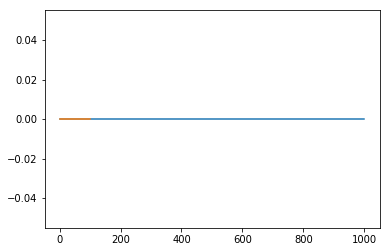

In [11]:
# plot of rewards

import matplotlib.pyplot as plt

plt.plot(range(1,len(scores_history) +1 ), scores_history)

plt.plot(range(1,len(scores) +1 ), scores)



In [11]:
import importlib
importlib.reload(agent)

<module 'agent' from '/home/workspace/agent.py'>

In [ ]:
%autoreload 1

When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 